# Get grid indices for sub-setting the satellite data
Created by Ivan Lima on Thu Dec  1 2021 10:32:45 -0500

In this notebook we subset the high resolution satellite data for the North Atlantic region to speed up the data extraction for WOD data.

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import hvplot.xarray
from my_bokeh_themes import *

In [2]:
sns.set_theme(context='paper', style='ticks', palette='tab10', rc={'figure.dpi':100, 'figure.figsize':[5, 5], 'axes.grid':True})

## Hi-res SST 

In [3]:
ds_sst = xr.open_dataset('/home/ivan/Data/Postproc/Satellite_Data/PO.DAAC/subset_20190727090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc')
print('Longitude: {:.2f}, {:.2f}'.format(ds_sst.lon.min().item(), ds_sst.lon.max().item()))
print('Latitude:  {:.2f}, {:.2f}'.format(ds_sst.lat.min().item(), ds_sst.lat.max().item()))

Longitude: -79.99, -59.99
Latitude:  29.01, 50.01


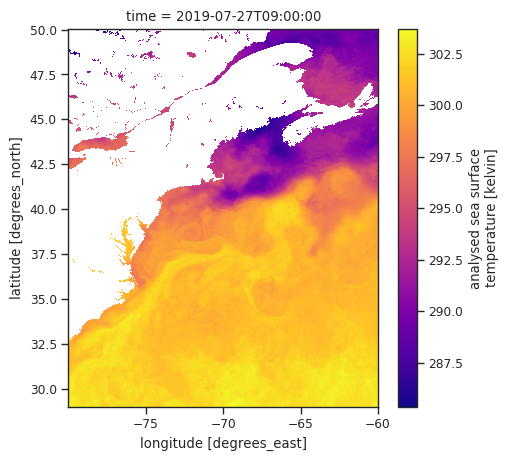

In [4]:
# ds_sst.analysed_sst.isel(time=0).hvplot(geo=True, frame_width=300)
fig, ax = plt.subplots()
_ = ds_sst.analysed_sst.isel(time=0).plot(ax=ax, cmap=plt.cm.plasma)

## Chlorophyll

In [5]:
ds_chl = xr.open_dataset('/bali/data/ilima/Satellite_Data/Ocean_Color/Chl/daily/2003/09/20030905_d-ACRI-L4-CHL-MULTI_4KM-GLO-REP.nc')
chl = ds_chl.CHL.isel(time=0, lon=slice(2350,3110), lat=slice(830,1500))
print('Longitude: {:.2f}, {:.2f}'.format(chl.lon.min().item(), chl.lon.max().item()))
print('Latitude:  {:.2f}, {:.2f}'.format(chl.lat.min().item(), chl.lat.max().item()))

Longitude: -82.06, -50.44
Latitude:  27.52, 55.40


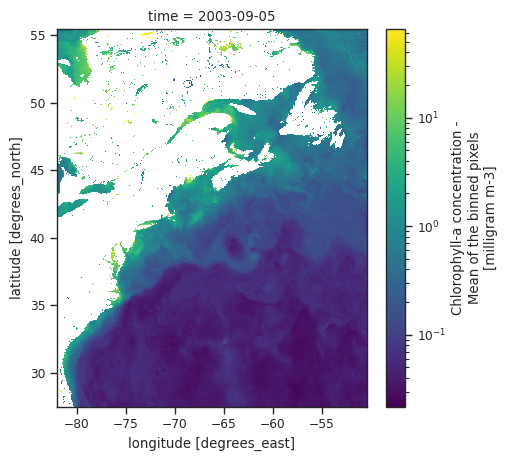

In [6]:
from matplotlib import colors
# chl.hvplot(geo=True, frame_width=300, logz=True)
fig, ax = plt.subplots()
_ = chl.plot(ax=ax, norm=colors.LogNorm())

## KD490 

In [7]:
ds_kd490 = xr.open_dataset('/bali/data/ilima/Satellite_Data/Ocean_Color/KD490/daily/2014/07/20140707_d-ACRI-L4-KD490-MULTI_4KM-GLO-REP.nc')
kd490 = ds_kd490.KD490.isel(time=0, lon=slice(2350,3110), lat=slice(830,1500))
print('Longitude: {:.2f}, {:.2f}'.format(kd490.lon.min().item(), kd490.lon.max().item()))
print('Latitude:  {:.2f}, {:.2f}'.format(kd490.lat.min().item(), kd490.lat.max().item()))

Longitude: -82.06, -50.44
Latitude:  27.52, 55.40


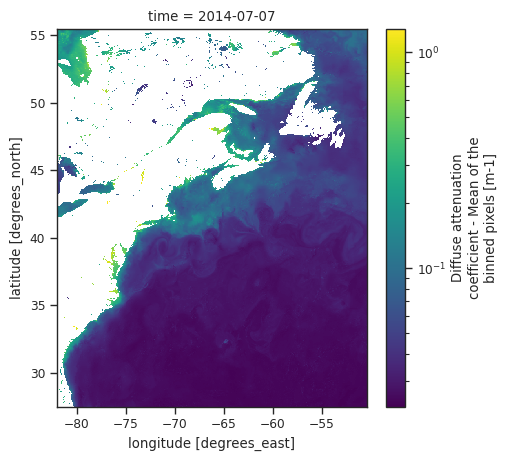

In [8]:
# kd490.hvplot(geo=True, frame_width=300, logz=True)
fig, ax = plt.subplots()
_ = kd490.plot(ax=ax, norm=colors.LogNorm())